# RecDP end to end pipeline

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
test_data = pd.read_csv("ibm_fraud_detect_test.csv")

In [2]:
from pyrecdp.autofe import FeatureWrangler, DataEstimator

config = {'dataset': test_data, 'label': 'Is Fraud?'}
predict_pipeline = DataEstimator(data_pipeline = "fraud_detect.json", method = 'predict', config = config)
predictions = predict_pipeline.fit_transform()

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /bert-base-multilingual-cased/resolve/main/vocab.txt (Caused by ProxyError('Cannot connect to proxy.', TimeoutError('timed out')))' thrown while requesting HEAD https://huggingface.co/bert-base-multilingual-cased/resolve/main/vocab.txt


{0: DataFrame, 1: type_infer, 2: fillna, 3: rename, 4: categorify, 5: DataFrame, 6: type_infer, 7: string_to_number, 8: fillna, 9: rename, 10: datetime_feature, 11: drop, 12: categorify, 13: onehot_encode, 14: list_onehot_encode, 15: rename, 16: drop, 17: astype, 18: lightgbm}
execute with pandas started ...
execute DataFrame started ...
  execute DataFrame took 6.678048521280289e-06 sec
execute type_infer started ...
  execute type_infer took 1.8848106265068054e-05 sec
execute fillna started ...
  execute fillna took 0.10662609012797475 sec
execute rename started ...
  execute rename took 0.13061467302031815 sec
execute categorify started ...
  execute categorify took 0.3236969420686364 sec
execute DataFrame started ...
  execute DataFrame took 1.5601981431245804e-05 sec
execute type_infer started ...
  execute type_infer took 0.4752334530930966 sec
execute string_to_number started ...
  execute string_to_number took 2.0411354759708047 sec
execute fillna started ...
  execute fillna t

In [3]:
predictions[(predictions['Is_Fraud'] == 1) & (predictions['predict_value'] > 0.5)]

,User,Card,Year,Month,Day,Merchant_Name,Zip,MCC,Is_Fraud,Amount__string_to_number,Time__day,Time__month,Time__weekday,Time__year,Time__hour,Use_Chip__idx,Merchant_City__idx,Merchant_State__idx,Errors__idx,Card__0,Card__1,Card__2,Card__3,Card__4,Card__5,Card__6,Card__7,Card__8,Use_Chip__Chip_Transaction,Use_Chip__Online_Transaction,Use_Chip__Swipe_Transaction,Errors_Bad_CVV,Errors_Bad_Card_Number,Errors_Bad_Expiration,Errors_Bad_PIN,Errors_Bad_Zipcode,Errors_Insufficient_Balance,Errors_Technical_Glitch,predict_value
1444,1,1,2019,5,11,9057735476014445185,-1.0,5311,1,14,28,3,1,2023,14,0,6581,52,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.676092
1460,1,1,2019,5,25,3189517333335617109,-1.0,5311,1,130,28,3,1,2023,14,0,6581,52,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.000000
1461,1,1,2019,5,25,3189517333335617109,-1.0,5311,1,38,28,3,1,2023,14,0,6581,52,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.000000
9457,6,1,2019,3,12,3189517333335617109,-1.0,5311,1,0,28,3,1,2023,13,0,6581,52,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.000000
9479,6,1,2019,3,21,4573875080712571902,-1.0,5045,1,71,28,3,1,2023,16,0,6581,52,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.987031
17630,15,2,2019,5,28,9057735476014445185,-1.0,5311,1,26,28,3,1,2023,13,0,6581,52,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.676092
43962,41,1,2019,8,17,-245178307025547046,-1.0,5311,1,363,28,3,1,2023,15,0,6581,52,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.000000
43963,41,1,2019,8,17,9057735476014445185,-1.0,5311,1,24,28,3,1,2023,16,0,6581,52,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.676092
43978,41,1,2019,8,24,9057735476014445185,-1.0,5311,1,51,28,3,1,2023,14,0,6581,52,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.676092
43985,41,1,2019,8,27,9057735476014445185,-1.0,5311,1,32,28,3,1,2023,15,0,6581,52,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.676092


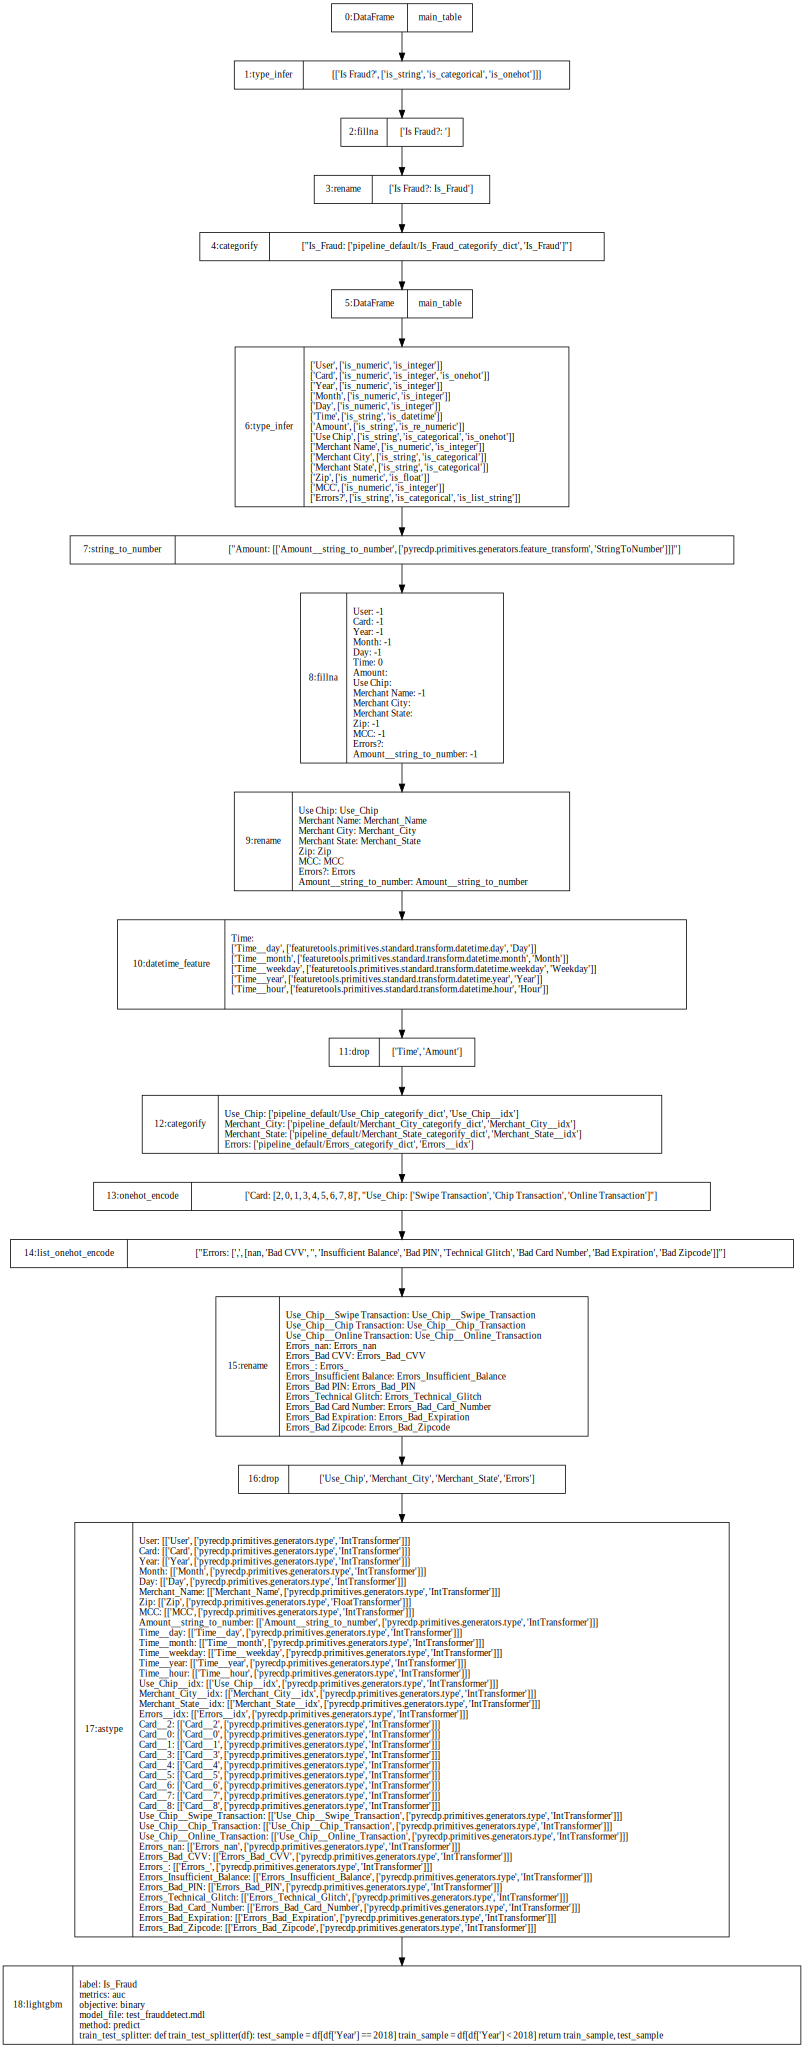

In [4]:
predict_pipeline.plot()